In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
ROOT_DIR = "."
FILENAME = "results_v3.tsv"

In [3]:
df = pd.read_csv(os.path.join(ROOT_DIR, FILENAME), sep="\t", header=0)

In [4]:
df.tail()

,sub_id,gender,age,participant_type,task,run,tracked_point,event_type,ix_ref,ix_pred,diff_samples,diff_msec,event_true,event_predicted,TP,FN,FP,check
6022,pp126,F,41,MS,Fast,NaN,left_ankle,IC,182.0,177.0,5.0,25.0,1,1,1,0,0,1
6023,pp126,F,41,MS,Fast,NaN,left_ankle,IC,425.0,426.0,-1.0,-5.0,1,1,1,0,0,1
6024,pp126,F,41,MS,Fast,NaN,left_ankle,IC,654.0,655.0,-1.0,-5.0,1,1,1,0,0,1
6025,pp126,F,41,MS,Fast,NaN,left_ankle,IC,877.0,876.0,1.0,5.0,1,1,1,0,0,1
6026,pp126,F,41,MS,Fast,NaN,left_ankle,FC,74.0,74.0,0.0,0.0,1,1,1,0,0,1


In [5]:
# Split ICs and FCs
df_ic = df.loc[df["event_type"]=="IC"]
df_ic_clean = df_ic[(df_ic["ix_ref"].notna()) & (df_ic["ix_pred"].notna())]
df_fc = df.loc[df["event_type"]=="FC"]
df_fc_clean = df_fc[(df_fc["ix_ref"].notna()) & (df_fc["ix_pred"].notna())]

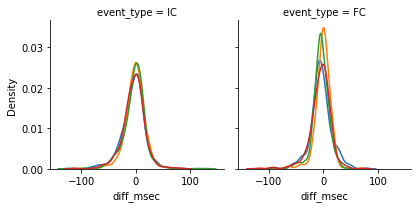

In [6]:
g = sns.FacetGrid(df, col="event_type", hue="tracked_point")
g.map(sns.kdeplot, "diff_msec")

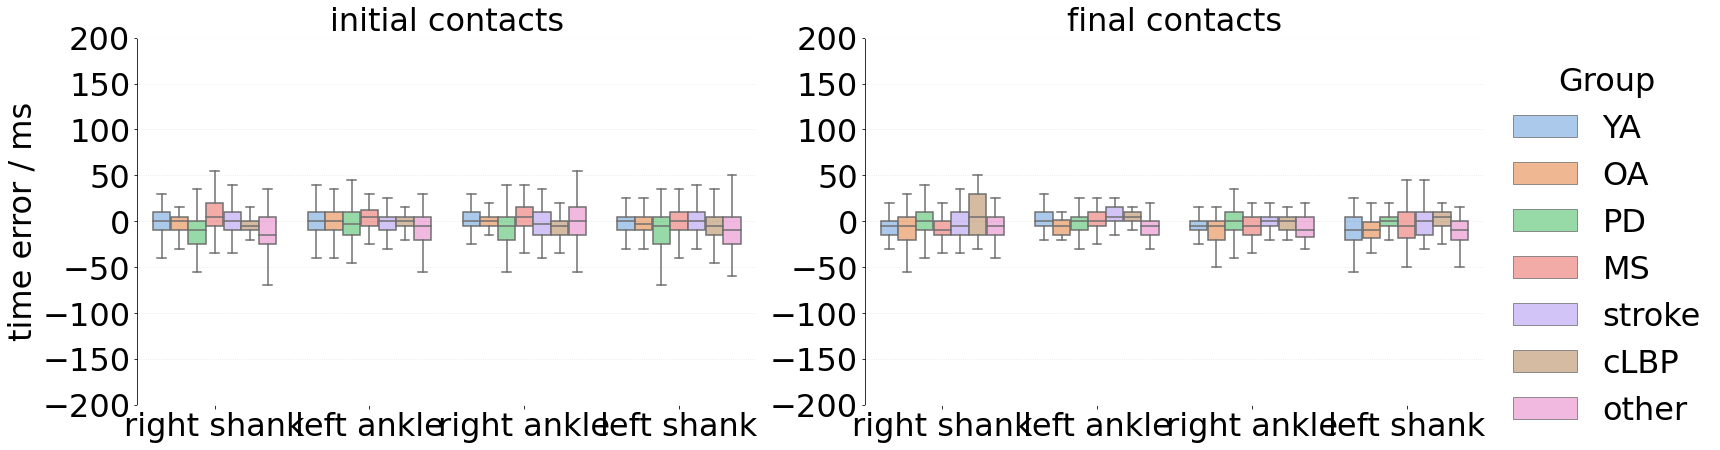

In [42]:
hue_order = ['YA', 'OA', 'PD', 'MS', 'stroke', 'cLBP', 'other']

cm = 1/2.54
fig, axs = plt.subplots(1, 2, figsize=(15*cm, 6*cm))
sns.boxplot(data=df_ic_clean, x="tracked_point", y="diff_msec", hue="participant_type", hue_order=hue_order, ax=axs[0], palette="pastel", showfliers=False)
axs[0].set_xlabel("")
axs[0].set_xticklabels(["right shank", "left ankle", "right ankle", "left shank"])
axs[0].set_ylabel("time error / ms", size=32)
axs[0].set_ylim([-200, 200])
axs[0].set_title('initial contacts', fontsize=32)
axs[0].spines['top'].set_color('white')
axs[0].spines['right'].set_color('white')
axs[0].spines['bottom'].set_color('white')
axs[0].grid(axis='y', c=(0,0,0), alpha=0.1, ls=":")
for label in axs[0].get_xticklabels():
    label.set_fontsize(32)
for label in axs[0].get_yticklabels():
    label.set_fontsize(32)
axs[0].legend([], [], frameon=False)

sns.boxplot(data=df_fc_clean, x="tracked_point", y="diff_msec", hue="participant_type", hue_order=hue_order, ax=axs[1], palette="pastel", showfliers=False)
axs[1].set_xlabel("")
axs[1].set_xticklabels(["right shank", "left ankle", "right ankle", "left shank"])
axs[1].set_ylabel("", size=32)
axs[1].set_ylim([-200, 200])
axs[1].set_title('final contacts', fontsize=32)
axs[1].spines['top'].set_color('white')
axs[1].spines['right'].set_color('white')
axs[1].spines['bottom'].set_color('white')
axs[1].grid(axis='y', c=(0,0,0), alpha=0.1, ls=":")
for label in axs[1].get_xticklabels():
    label.set_fontsize(32)
for label in axs[1].get_yticklabels():
    label.set_fontsize(32)
axs[1].legend(title='Group', title_fontsize=32, frameon=False, fontsize=32, loc=2, bbox_to_anchor=(1,1))
plt.tight_layout()
plt.savefig("/home/robbin/Desktop/box_plots_ICs_and_FCs_fliers_false.png", dpi=300)
plt.show()

In [33]:
from scipy import stats

In [40]:
df_time_error = {
    # "participant_type": [],
    "tracked_point": [],
    "median": [],
    "Q25": [],
    "Q75": [],
    "mean": [],
    "sd": [],
    "se": [],
    "lower_lim": [],
    "upper_lim": []
}
groups = df_fc_clean.groupby(["tracked_point"])
for t, df_sel in groups:
    # df_time_error["participant_type"].append(t[1])
    df_time_error["tracked_point"].append(t[0])
    df_time_error["median"].append(df_sel["diff_msec"].median())
    df_time_error["Q25"].append(df_sel["diff_msec"].quantile(q=0.25))
    df_time_error["Q75"].append(df_sel["diff_msec"].quantile(q=0.75))
    df_time_error["mean"].append(df_sel["diff_msec"].mean())
    df_time_error["sd"].append(df_sel["diff_msec"].std())
    df_time_error["se"].append(df_sel["diff_msec"].std()/np.sqrt(df_sel["diff_msec"].count()))
    df_time_error["lower_lim"].append(df_sel["diff_msec"].mean() - 1.96*df_sel["diff_msec"].std()/np.sqrt(df_sel["diff_msec"].count()))
    df_time_error["upper_lim"].append(df_sel["diff_msec"].mean() + 1.96*df_sel["diff_msec"].std()/np.sqrt(df_sel["diff_msec"].count()))
    

# pd.DataFrame(df_time_error).to_csv("time_error.tsv", sep="\t")
pd.DataFrame(df_time_error).to_csv("time_agreement_FC_tp.tsv", sep="\t")
# df_sel

In [181]:
df_sel["diff_msec"].count(), df_sel["diff_msec"].mean(), df_sel["diff_msec"].std(), df_sel["diff_msec"].std()/np.sqrt(df_sel["diff_msec"].count())

(37, 2.7027027027027026, 22.80943379986163, 3.74984781770584)

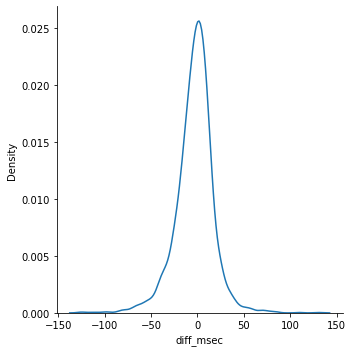

In [109]:
sns.displot(df_ic_clean, x="diff_msec", kind="kde")

The Wilcoxon signed-rank test tests the null hypothesis that two related paired samples come from the same distribution. In particular, it tests whether the distribution of the differences x - y is symmetric about zero.

In [99]:
df_ic_clean = df_ic.dropna(axis="index", how="any", inplace=False)

In [100]:
len(df_ic_clean)

793

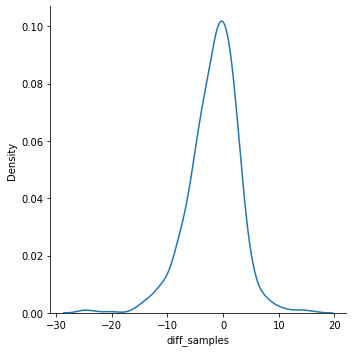

In [90]:
sns.displot(df_ic_clean, x="diff_samples", kind="kde")

In [93]:
from scipy.stats import wilcoxon
W, p = wilcoxon(df_ic_clean["ix_ref"], df_ic_clean["ix_pred"], alternative="less")
print(W, p)

72610.0 6.167221698076752e-23


In [95]:
groups = df_ic_clean.groupby(by=["participant_type", "tracked_point"])
for g, df_sel in groups:
    print(g)

('MS', 'left_ankle')
('MS', 'left_shank')
('MS', 'right_ankle')
('MS', 'right_shank')
('PD', 'left_ankle')
('PD', 'left_shank')
('PD', 'right_ankle')
('PD', 'right_shank')


## Gait Parameters

In [45]:
sub_id = "pp156"
task = "Fast"
tracked_point = "left_shank"
df_select = df.loc[(df['sub_id']==sub_id) & (df['task']==task) & (df['tracked_point']==tracked_point)]
df_select

,sub_id,gender,age,participant_type,task,run,tracked_point,event_type,ix_ref,ix_pred,diff_samples,diff_msec,event_true,event_predicted,TP,FN,FP,check
26,pp156,F,49,MS,Fast,NaN,left_shank,IC,139.0,NaN,NaN,NaN,1,0,0,1,0,1
27,pp156,F,49,MS,Fast,NaN,left_shank,IC,329.0,325.0,4.0,20.0,1,1,1,0,0,1
28,pp156,F,49,MS,Fast,NaN,left_shank,IC,514.0,515.0,-1.0,-5.0,1,1,1,0,0,1
29,pp156,F,49,MS,Fast,NaN,left_shank,IC,700.0,699.0,1.0,5.0,1,1,1,0,0,1
30,pp156,F,49,MS,Fast,NaN,left_shank,IC,882.0,881.0,1.0,5.0,1,1,1,0,0,1
31,pp156,F,49,MS,Fast,NaN,left_shank,IC,1085.0,1084.0,1.0,5.0,1,1,1,0,0,1
32,pp156,F,49,MS,Fast,NaN,left_shank,FC,76.0,NaN,NaN,NaN,1,0,0,1,0,1
33,pp156,F,49,MS,Fast,NaN,left_shank,FC,264.0,NaN,NaN,NaN,1,0,0,1,0,1
34,pp156,F,49,MS,Fast,NaN,left_shank,FC,451.0,446.0,5.0,25.0,1,1,1,0,0,1
35,pp156,F,49,MS,Fast,NaN,left_shank,FC,632.0,NaN,NaN,NaN,1,0,0,1,0,1


In [62]:
ref_IC = np.sort(df_select.loc[df_select["event_type"]=="IC"]["ix_ref"].values[:])
ref_FC = np.sort(df_select.loc[df_select["event_type"]=="FC"]["ix_ref"].values[:])


In [71]:
for i in range(len(ref_IC)-1):
    if np.isnan(ref_IC[i]) or np.isnan(ref_IC[i+1]):
        continue
    j = np.argwhere(ref_FC > ref_IC[i])[:,0][0]
    stride_time = (ref_IC[i+1] - ref_IC[i])/200
    stance_time = (ref_FC[j] - ref_IC[i])/200
    swing_time = (ref_IC[i+1] - ref_FC[j])/200
    # print(f"{ref_IC[i]:>6.0f} <---{stride_time:^6.3f}---> {ref_IC[i+1]:<6.0f}")
    print(f"{ref_IC[i]:>6.0f} <--- {stance_time:^6.3f} ---> {ref_FC[j]:^6.0f} <--- {swing_time:^6.3f} ---> {ref_IC[i+1]:<6.0f}")

   139 <--- 0.625  --->  264   <--- 0.325  ---> 329   
   329 <--- 0.610  --->  451   <--- 0.315  ---> 514   
   514 <--- 0.590  --->  632   <--- 0.340  ---> 700   
   700 <--- 0.570  --->  814   <--- 0.340  ---> 882   
   882 <--- 0.650  --->  1012  <--- 0.365  ---> 1085  


In [59]:
i = 0
while i < len(ref_IC)-1:
    if np.isnan(ref_IC[i]) or np.isnan(pred_IC[i]):
        i += 1
    if np.isnan(ref_IC[i+1]) or np.isnan(pred_IC[i+1]):
        i += 1
    j = np.argwhere(ref_FC > ref_IC[i])[:,0][0]
    if np.isnan(pred_FC[j]):
        i += 1
    print(f"{ref_IC[i]:>8.0f}{ref_FC[j]:>8.0f}{ref_IC[i+1]:>8.0f} / {pred_IC[i]:>8.0f}{pred_FC[j]:>8.0f}{pred_IC[i+1]:>8.0f}")
    i += 1

     329     451     514 /      325     446     515
     700     632     882 /      699     nan     881
     882    1012    1085 /      881    1008    1084


In [37]:

def print_gait_metrics(df_select):
    ix_IC_ref = df_select.loc[df_select["event_type"]=="IC"]["ix_ref"].values[:]
    ix_IC_pred = df_select.loc[df_select["event_type"]=="IC"]["ix_pred"].values[:]
    ix_FC_ref = df_select.loc[df_select["event_type"]=="FC"]["ix_ref"].values[:]
    ix_FC_pred = df_select.loc[df_select["event_type"]=="FC"]["ix_pred"].values[:]
    
    print(f"{'Stride time':>17s} {'Stance time':>17s} {'Swing time':>17s}")
    print(f"{'ref':>8s} {'pred':>8s} {'ref':>8s} {'pred':>8s} {'ref':>8s} {'pred':>8s}")
    for i in range(len(ix_IC_ref)-1):
        if np.isnan(ix_IC_ref[i]) or np.isnan(ix_IC_ref[i+1]):
            continue
        else:
            msg = f"{(ix_IC_ref[i+1]-ix_IC_ref[i])/200:8.2f}"
            if np.isnan(ix_IC_pred[i]) or np.isnan(ix_IC_pred[i+1]):
                msg += f" {'n/a':8s}"
                continue
            else:
                msg += f" {(ix_IC_pred[i+1]-ix_IC_pred[i])/200:8.2f}"
                k = np.argwhere(ix_FC_pred > ix_IC_pred[i])[:,0][0]
            # print(f"Stride time: {(ix_IC_ref[i+1]-ix_IC_ref[i])/200:.2f} {(ix_IC_pred[i+1]-ix_IC_pred[i])/200:.2f}")
            j = np.argwhere(ix_FC_ref > ix_IC_ref[i])[:,0][0]
            msg += f" {(ix_FC_ref[j]-ix_IC_ref[i])/200:8.2f}"
            msg += f" {(ix_FC_pred[k]-ix_IC_pred[i])/200:8.2f}"
            msg += f" {(ix_IC_ref[i+1]-ix_FC_ref[j])/200:8.2f}"
            msg += f" {(ix_IC_pred[i+1]-ix_FC_pred[k])/200:8.2f}"
        print(msg)
    return

In [43]:
df_gait_metrics = {
    'sub_id': [],
    'task': [],
    'tracked_point': [],
    'metric': [],
    'ref': [],
    'pred': []
}
for sub_id in df["sub_id"].unique()[:1]:
    for task in df["task"].unique()[:1]:
        for tracked_point in df["tracked_point"].unique():
            # Dataframe
            df_select = df.loc[(df['sub_id']==sub_id) & (df['task']==task) & (df['tracked_point']==tracked_point)]
            
            # Event timings
            ix_IC_ref = df_select.loc[df_select["event_type"]=="IC"]["ix_ref"].values[:]
            ix_IC_pred = df_select.loc[df_select["event_type"]=="IC"]["ix_pred"].values[:]
            ix_FC_ref = df_select.loc[df_select["event_type"]=="FC"]["ix_ref"].values[:]
            ix_FC_pred = df_select.loc[df_select["event_type"]=="FC"]["ix_pred"].values[:]
            
            # Loop over initial contacts
            for i in range(len(ix_IC_ref)-1):
                if not(np.isnan(ix_IC_ref[i])) and not(np.isnan(ix_IC_ref[i+1])) and not(np.isnan(ix_IC_pred[i])) and not(np.isnan(ix_IC_pred[i+1])):
                    stride_time_ref = (ix_IC_ref[i+1] - ix_IC_ref[i])/200
                    stride_time_pred = (ix_IC_pred[i+1] - ix_IC_pred[i])/200
                    j = np.argwhere(ix_FC_ref > ix_IC_ref[i])[:,0][0]
                    stance_time_ref = (ix_FC_ref[j] - ix_IC_ref[i])/200
                    k = np.argwhere(ix_FC_pred > ix_IC_pred[i])[:,0][0]
                    stance_time_pred = (ix_FC_pred[k] - ix_IC_pred[i])/200
                    swing_time_ref = (ix_IC_ref[i+1] - ix_FC_ref[j])/200
                    swing_time_pred = (ix_IC_pred[i+1] - ix_FC_pred[j])/200
                    for r in range(3):
                        df_gait_metrics['sub_id'].append(sub_id)
                        df_gait_metrics['task'].append(task)
                        df_gait_metrics['tracked_point'].append(tracked_point)
                    df_gait_metrics['metric'].append('stride')
                    df_gait_metrics['ref'].append(stride_time_ref)
                    df_gait_metrics['pred'].append(stride_time_pred)
                    df_gait_metrics['metric'].append('stance')
                    df_gait_metrics['ref'].append(stance_time_ref)
                    df_gait_metrics['pred'].append(stance_time_pred)
                    df_gait_metrics['metric'].append('swing')
                    df_gait_metrics['ref'].append(swing_time_ref)
                    df_gait_metrics['pred'].append(swing_time_pred)

In [44]:
pd.DataFrame(df_gait_metrics)

,sub_id,task,tracked_point,metric,ref,pred
0,pp156,Fast,left_ankle,stride,0.950,0.945
1,pp156,Fast,left_ankle,stance,0.625,0.615
2,pp156,Fast,left_ankle,swing,0.325,0.330
3,pp156,Fast,left_ankle,stride,0.925,0.925
4,pp156,Fast,left_ankle,stance,0.610,0.605
5,pp156,Fast,left_ankle,swing,0.315,0.320
6,pp156,Fast,left_ankle,stride,0.930,0.935
7,pp156,Fast,left_ankle,stance,0.590,0.580
8,pp156,Fast,left_ankle,swing,0.340,0.355
9,pp156,Fast,left_ankle,stride,0.910,0.905


In [36]:
df_select = df.loc[(df['sub_id']=="pp156") & (df['task']=="Fast") & (df['tracked_point']=="right_ankle")]
df_select

,sub_id,gender,age,participant_type,task,run,tracked_point,event_type,ix_ref,ix_pred,diff_samples,diff_msec,event_true,event_predicted,TP,FN,FP,check
13,pp156,F,49,MS,Fast,NaN,right_ankle,IC,37.0,NaN,NaN,NaN,1,0,0,1,0,1
14,pp156,F,49,MS,Fast,NaN,right_ankle,IC,234.0,231.0,3.0,15.0,1,1,1,0,0,1
15,pp156,F,49,MS,Fast,NaN,right_ankle,IC,424.0,425.0,-1.0,-5.0,1,1,1,0,0,1
16,pp156,F,49,MS,Fast,NaN,right_ankle,IC,606.0,602.0,4.0,20.0,1,1,1,0,0,1
17,pp156,F,49,MS,Fast,NaN,right_ankle,IC,785.0,781.0,4.0,20.0,1,1,1,0,0,1
18,pp156,F,49,MS,Fast,NaN,right_ankle,IC,978.0,976.0,2.0,10.0,1,1,1,0,0,1
19,pp156,F,49,MS,Fast,NaN,right_ankle,IC,1183.0,1180.0,3.0,15.0,1,1,1,0,0,1
20,pp156,F,49,MS,Fast,NaN,right_ankle,FC,166.0,162.0,4.0,20.0,1,1,1,0,0,1
21,pp156,F,49,MS,Fast,NaN,right_ankle,FC,354.0,351.0,3.0,15.0,1,1,1,0,0,1
22,pp156,F,49,MS,Fast,NaN,right_ankle,FC,541.0,538.0,3.0,15.0,1,1,1,0,0,1


In [31]:
ix_IC_ref = df_select.loc[df_select["event_type"]=="IC"]["ix_ref"].values[:]
ix_IC_pred = df_select.loc[df_select["event_type"]=="IC"]["ix_pred"].values[:]
ix_FC_ref = df_select.loc[df_select["event_type"]=="FC"]["ix_ref"].values[:]
ix_FC_pred = df_select.loc[df_select["event_type"]=="FC"]["ix_pred"].values[:]
print(ix_IC_ref)
print(ix_IC_pred)
print(ix_FC_ref)
print(ix_FC_pred)

[ 219.  540.  871. 1224. 1563. 1905.]
[ 228.  549.  878. 1228. 1566. 1910.]
[ 116.  440.  768. 1113. 1450. 1804.]
[ 115.  437.  766. 1114. 1448. 1805.]


In [32]:
print(f"{'Stride time':>17s} {'Stance time':>17s} {'Swing time':>17s}")
print(f"{'ref':>8s} {'pred':>8s} {'ref':>8s} {'pred':>8s} {'ref':>8s} {'pred':>8s}")
for i in range(len(ix_IC_ref)-1):
    if np.isnan(ix_IC_ref[i]) or np.isnan(ix_IC_ref[i+1]):
        continue
    else:
        msg = f"{(ix_IC_ref[i+1]-ix_IC_ref[i])/200:8.2f}"
        if np.isnan(ix_IC_pred[i]) or np.isnan(ix_IC_pred[i+1]):
            msg += f" {'n/a':8s}"
        else:
            msg += f" {(ix_IC_pred[i+1]-ix_IC_pred[i])/200:8.2f}"
            k = np.argwhere(ix_FC_pred > ix_IC_pred[i])[:,0][0]
        # print(f"Stride time: {(ix_IC_ref[i+1]-ix_IC_ref[i])/200:.2f} {(ix_IC_pred[i+1]-ix_IC_pred[i])/200:.2f}")
        j = np.argwhere(ix_FC_ref > ix_IC_ref[i])[:,0][0]
        msg += f" {(ix_FC_ref[j]-ix_IC_ref[i])/200:8.2f}"
        msg += f" {(ix_FC_pred[k]-ix_IC_pred[i])/200:8.2f}"
        msg += f" {(ix_IC_ref[i+1]-ix_FC_ref[j])/200:8.2f}"
        msg += f" {(ix_IC_pred[i+1]-ix_FC_pred[k])/200:8.2f}"
    print(msg)

    # print(f"Stance time: {(ix_FC_ref[j]-ix_IC_ref[i])/200:.2f} {(ix_FC_pred[k]-ix_IC_pred[i])/200:.2f}")
    # print(f"Swing time: {(ix_IC_ref[i+1]-ix_FC_ref[j])/200:.2f} {(ix_IC_pred[i+1]-ix_FC_pred[k])/200:.2f}")

      Stride time       Stance time        Swing time
     ref     pred      ref     pred      ref     pred
    1.60     1.60     1.10     1.04     0.50     0.56
    1.66     1.65     1.14     1.08     0.52     0.56
    1.76     1.75     1.21     1.18     0.56     0.57
    1.70     1.69     1.13     1.10     0.56     0.59
    1.71     1.72     1.21     1.20     0.51     0.53


In [17]:
true_initial_contacts = np.asarray(df_select.loc[df_select["event_type"]=="IC"]["ix_ref"].values[:], dtype=int)
detected_initial_contacts = np.asarray(df_select.loc[df_select["event_type"]=="IC"]["ix_pred"].values[:], dtype=int)
true_final_contacts = np.asarray(df_select.loc[df_select["event_type"]=="FC"]["ix_ref"].values[:], dtype=int)
detected_final_contacts = np.asarray(df_select.loc[df_select["event_type"]=="FC"]["ix_pred"].values[:], dtype=int)

In [27]:
for i in range(1, len(true_initial_contacts)):
    print(f"Swing time: {(true_initial_contacts[i]-true_initial_contacts[i-1])/200:.3f} v {(detected_initial_contacts[i]-detected_initial_contacts[i-1])/200:.3f}")


Swing time: 1.605 v 1.595
Swing time: 1.655 v 1.650
Swing time: 1.765 v 1.750
Swing time: 1.695 v 1.695
Swing time: 1.710 v 1.715


## Events
Split events by event type. We don't want to mix up the detection of initial contacts and final contacts.

In [68]:
df_ic = df.loc[df['event_type']=='IC']
df_fc = df.loc[df['event_type']=='FC']

## Overall detection performance

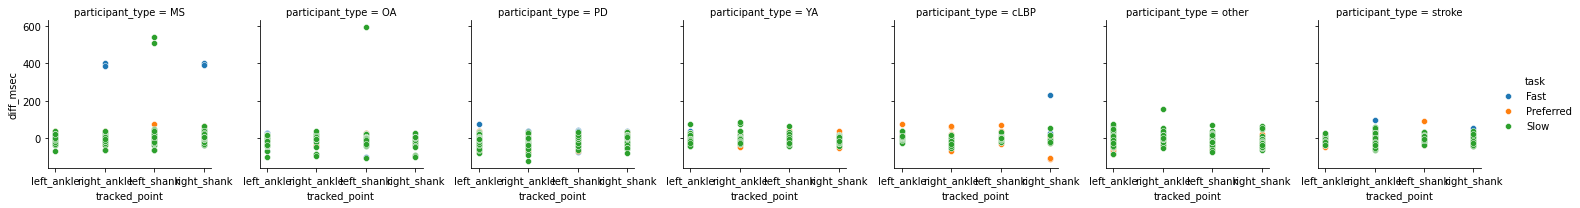

In [70]:
g = sns.FacetGrid(df_ic, col="participant_type", hue="task")
g.map(sns.scatterplot, "tracked_point", "diff_msec")
g.add_legend()
plt.show()

## Time error

In [12]:
fig, ax = plt.sublots()


('MS', 'left_ankle')
('MS', 'left_shank')
('MS', 'right_ankle')
('MS', 'right_shank')
('OA', 'left_ankle')
('OA', 'left_shank')
('OA', 'right_ankle')
('OA', 'right_shank')
('PD', 'left_ankle')
('PD', 'left_shank')
('PD', 'right_ankle')
('PD', 'right_shank')
('YA', 'left_ankle')
('YA', 'left_shank')
('YA', 'right_ankle')
('YA', 'right_shank')
('cLBP', 'left_ankle')
('cLBP', 'left_shank')
('cLBP', 'right_ankle')
('cLBP', 'right_shank')
('other', 'left_ankle')
('other', 'left_shank')
('other', 'right_ankle')
('other', 'right_shank')
('stroke', 'left_ankle')
('stroke', 'left_shank')
('stroke', 'right_ankle')
('stroke', 'right_shank')


In [ ]:
df_ic["diff"].describe()

count    1292.000000
mean       -0.962074
std         6.355779
min      -104.000000
25%        -3.000000
50%        -1.000000
75%         1.000000
max        82.000000
Name: diff, dtype: float64

In [ ]:
(df_ic["diff"].quantile(0.1), df_ic["diff"].quantile(0.9))

(-6.0, 3.0)

In [ ]:
df_ic.loc[df_ic["diff"]<df_ic["diff"].quantile(0.1)]

,sub,gender,participant_type,task,run,side,event_type,ix_ref,ix_pred,diff,tp,fp,fn,checksum
97,pp012,M,other,Slow,NaN,left,IC,711.0,718.0,-7.0,1,0,0,1
102,pp012,M,other,Slow,NaN,left,IC,1814.0,1824.0,-10.0,1,0,0,1
322,pp025,M,stroke,Fast,NaN,right,IC,499.0,508.0,-9.0,1,0,0,1
443,pp029,M,MS,Preferred,NaN,left,IC,292.0,299.0,-7.0,1,0,0,1
455,pp029,M,MS,Preferred,NaN,right,IC,962.0,971.0,-9.0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2616,pp140,M,PD,Slow,on,right,IC,1252.0,1259.0,-7.0,1,0,0,1
2617,pp140,M,PD,Slow,on,right,IC,1556.0,1568.0,-12.0,1,0,0,1
2673,pp149,M,stroke,Slow,NaN,right,IC,1876.0,1909.0,-33.0,1,0,0,1
2738,pp155,F,MS,Fast,NaN,left,IC,34.0,138.0,-104.0,1,0,0,1


/home/robbin/Projects/my-gait-events-tcn/venv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(-25.0, 25.0)

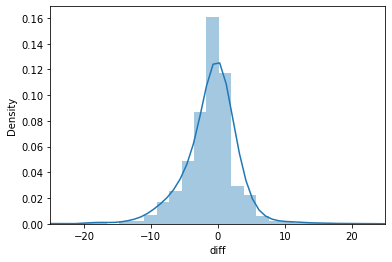

In [ ]:
fig, ax = plt.subplots(1, 1)
sns.distplot(df_ic['diff'], bins=100)
ax.set_xlim([-25, 25])